In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = "luad" # "bcss" "luad"
if dataset == "wsss4luad":
    datadir = "wsss4luad3k6_3k6"
    rng = ['', '_run2_r5', '_run3_2', '_run5_7', '_run9_3']
elif dataset == "bcss":
    datadir = "bcss7k2_7k2"
    rng = ['', '_run1', '_run2', '_run3', '_run4_2']
elif dataset == "luad":
    datadir = "luad3k6_3k6"
    rng = ['', '_run1', '_run2', '_run3', '_run4']

In [3]:
loss_seg_list = []
loss_labeled_cls_list = []
loss_unlabeled_cls_list = []
loss_reg_list = []

for run in rng: 
    metrics_path = f'logs/{datadir}{run}/metrics.csv'
    metrics = pd.read_csv(metrics_path)
    loss_seg = metrics['train_loss_seg'].dropna()
    loss_labeled_cls = metrics['train_loss_labeled_cls'].dropna()
    loss_unlabeled_cls = metrics['train_loss_unlabeled_cls'].dropna()
    loss_reg = metrics['train_loss_reg'].dropna()

    print(len(loss_seg), len(loss_labeled_cls), len(loss_unlabeled_cls), len(loss_reg))

    loss_seg_list.append(loss_seg)
    loss_labeled_cls_list.append(loss_labeled_cls)
    loss_unlabeled_cls_list.append(loss_unlabeled_cls)
    loss_reg_list.append(loss_reg)


260 260 260 260
260 260 260 260
260 260 260 260
260 260 260 260
260 260 260 260


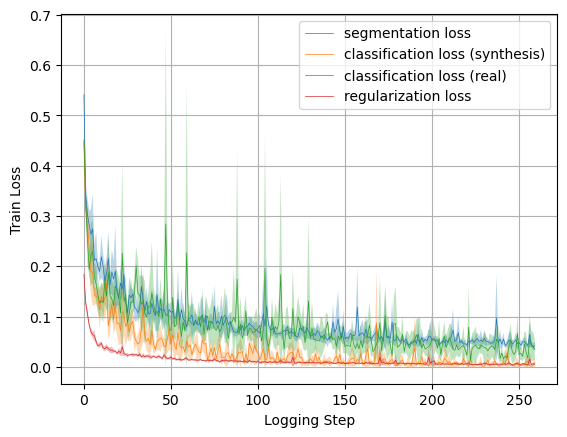

In [4]:
# Plot loss_seg

mean_loss_seg = np.mean(loss_seg_list, axis=0)
std_loss_seg = np.std(loss_seg_list, axis=0)
plt.plot(range(len(mean_loss_seg)), mean_loss_seg, label='segmentation loss', linewidth=0.5)
plt.fill_between(range(len(mean_loss_seg)), mean_loss_seg - std_loss_seg, mean_loss_seg + std_loss_seg, alpha=0.3)

# Plot loss_labeled_cls
mean_loss_labeled_cls = np.mean(loss_labeled_cls_list, axis=0)
std_loss_labeled_cls = np.std(loss_labeled_cls_list, axis=0)
plt.plot(range(len(mean_loss_labeled_cls)), mean_loss_labeled_cls, label='classification loss (synthesis)', linewidth=0.5)
plt.fill_between(range(len(mean_loss_labeled_cls)), np.maximum(mean_loss_labeled_cls - std_loss_labeled_cls, 0), mean_loss_labeled_cls + std_loss_labeled_cls, alpha=0.3)

# Plot loss_unlabeled_cls
mean_loss_unlabeled_cls = np.mean(loss_unlabeled_cls_list, axis=0)
std_loss_unlabeled_cls = np.std(loss_unlabeled_cls_list, axis=0)
plt.plot(range(len(mean_loss_unlabeled_cls)), mean_loss_unlabeled_cls, label='classification loss (real)', linewidth=0.5)
plt.fill_between(range(len(mean_loss_unlabeled_cls)), np.maximum(mean_loss_unlabeled_cls - std_loss_unlabeled_cls, 0), mean_loss_unlabeled_cls + std_loss_unlabeled_cls, alpha=0.3)

# Plot loss_reg
mean_loss_reg = np.mean(loss_reg_list, axis=0)
std_loss_reg = np.std(loss_reg_list, axis=0)
plt.plot(range(len(mean_loss_reg)), mean_loss_reg, label='regularization loss', linewidth=0.5)
plt.fill_between(range(len(mean_loss_reg)), np.maximum(mean_loss_reg - std_loss_reg, 0), mean_loss_reg + std_loss_reg, alpha=0.3)

plt.xlabel('Logging Step')
plt.ylabel('Train Loss')
# plt.yscale('log', base=10, subs=[10**x for x in (0.25, 0.5, 0.75)], nonpositive='mask')
plt.grid()
plt.legend()
plt.show()
